# Line plots and interactivity 
# with Matplotlib, Seaborn, Plotly, and Altair

In [1]:
# numerical
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.5)
cp = sns.color_palette()

# altair
import altair

# plotly express
import plotly.express as px

## Data

In [2]:
ts = pd.read_csv('data/ts.csv')
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [3]:
# casting to datetime is important for
# ensuring plots "just work"

ts.dt = pd.to_datetime(ts.dt)

ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      4000 non-null   datetime64[ns]
 1   kind    4000 non-null   object        
 2   value   4000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 93.9+ KB


In [4]:
ts.head()

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937


In [5]:
dfp = ts.pivot(index='dt', columns='kind', values='value')
dfp.head()

kind,A,B,C,D
dt,,,,
2000-01-01,1.442521,1.808741,0.437415,0.096980
2000-01-02,1.981290,2.277020,0.706127,-1.523108
2000-01-03,1.586494,3.474392,1.358063,-3.100735
2000-01-04,1.378969,2.906132,0.262223,-2.660599
2000-01-05,-0.277937,3.489553,0.796743,-3.417402


## Matplotlib

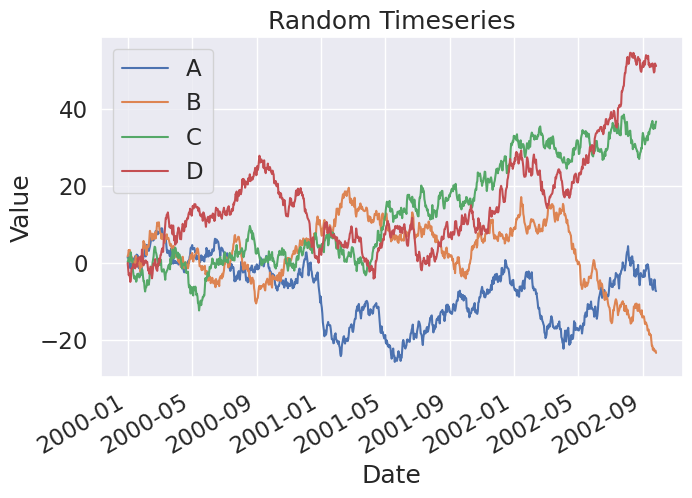

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

for k in ts.kind.unique():
    tmp = ts[ts.kind == k]
    ax.plot(tmp['dt'], tmp.value, label=k)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')    
    
ax.legend(loc=2)
fig.autofmt_xdate()

In [8]:
dfp.columns

Index(['A', 'B', 'C', 'D'], dtype='object', name='kind')

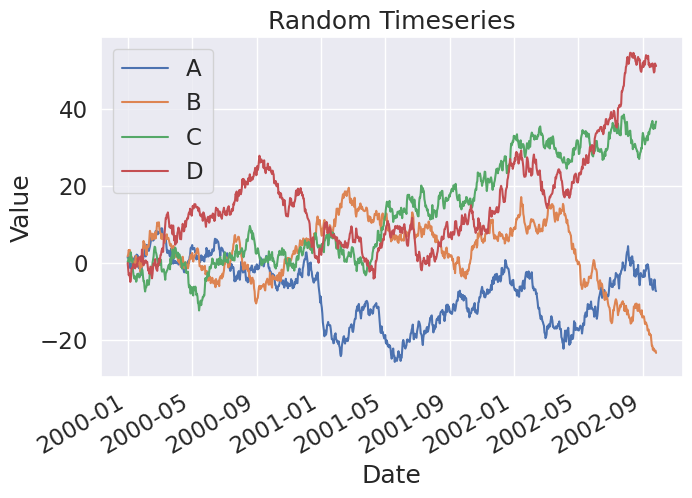

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

ax.plot(dfp)

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')

ax.legend(dfp.columns, loc=2)
fig.autofmt_xdate()

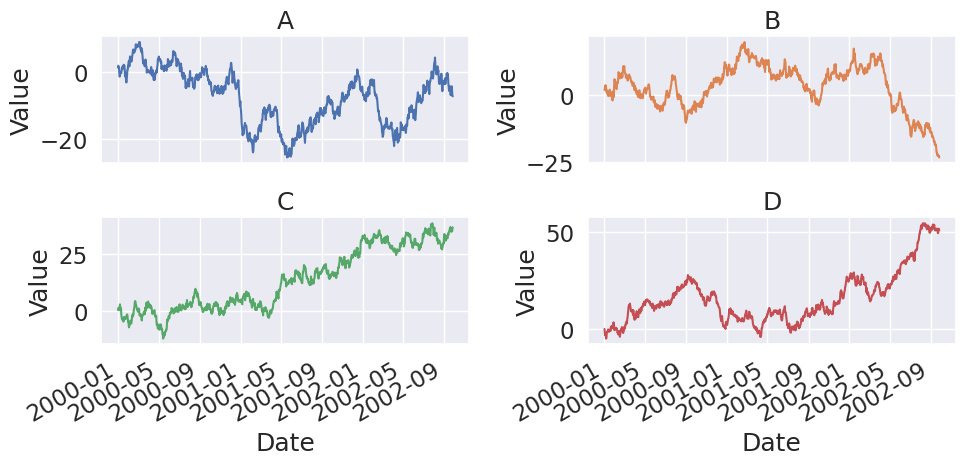

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

for i, k in enumerate(ts.kind.unique()):
    ax = plt.subplot(int('22' + str(i + 1)))
    tmp = ts[ts.kind == k]
    ax.plot(tmp.dt, tmp.value, label=k, c=cp[i])

    ax.set(xlabel='Date',
           ylabel='Value',
           title=k)    
    
fig.autofmt_xdate()
fig.tight_layout()

## Seaborn

In [13]:
ts

,dt,kind,value
0,2000-01-01,A,1.442521
1,2000-01-02,A,1.981290
2,2000-01-03,A,1.586494
3,2000-01-04,A,1.378969
4,2000-01-05,A,-0.277937
...,...,...,...
3995,2002-09-22,D,49.620428
3996,2002-09-23,D,49.862924
3997,2002-09-24,D,51.965224
3998,2002-09-25,D,51.667035


<Axes: xlabel='dt', ylabel='value'>

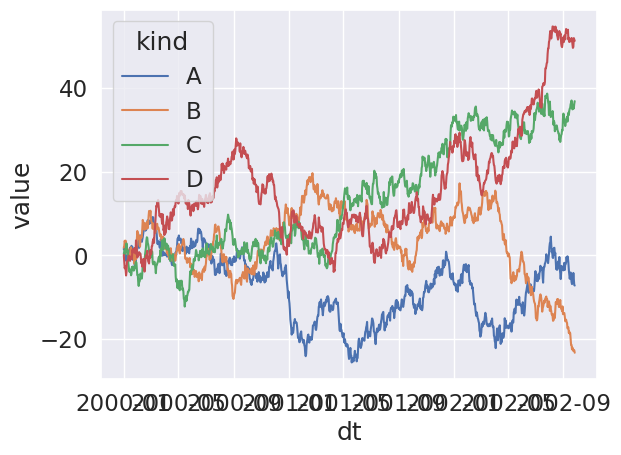

In [14]:
sns.lineplot(data=ts, x='dt', y='value', hue='kind')

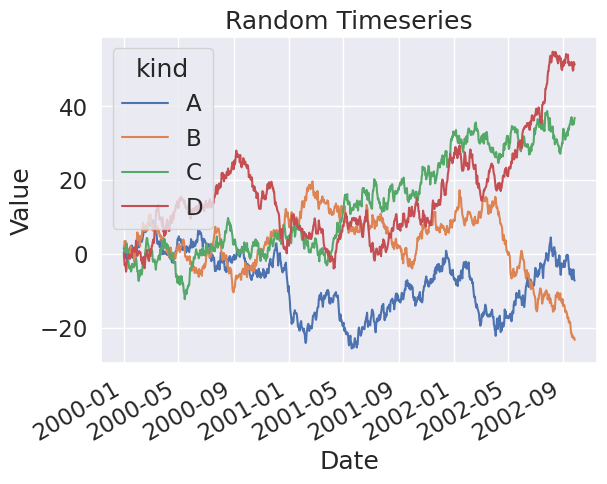

In [15]:
ax = sns.lineplot(data=ts, x='dt', y='value', hue='kind')

ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')

ax.get_figure().autofmt_xdate()

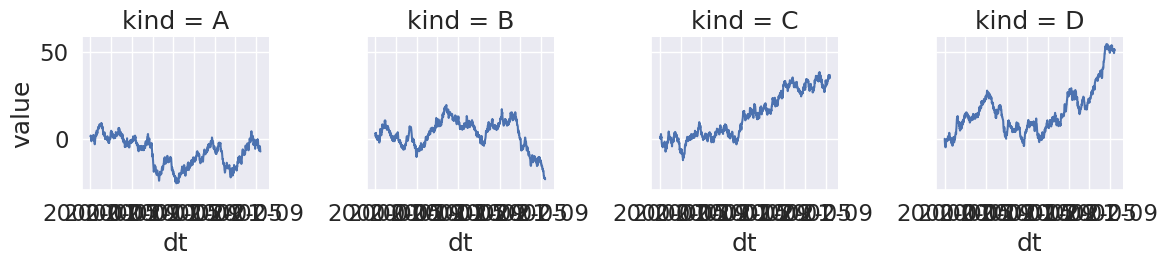

In [16]:
g = sns.FacetGrid(ts, col="kind")
g.map_dataframe(sns.lineplot, x='dt', y='value')

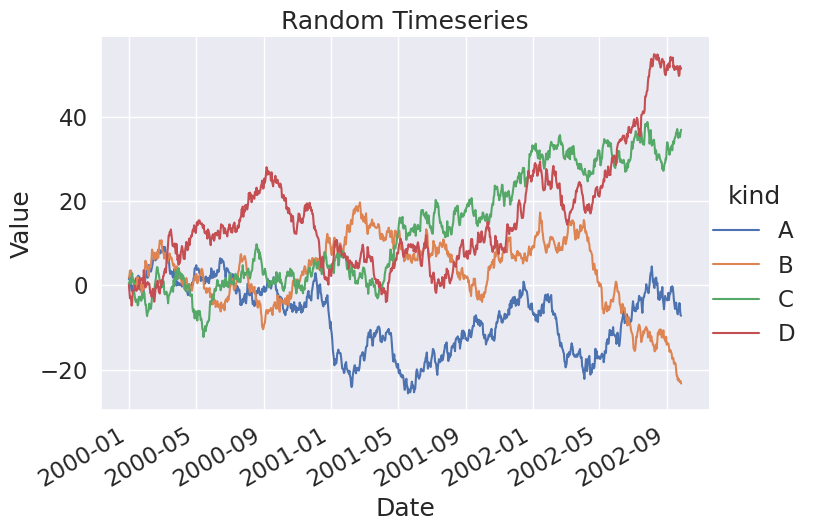

In [17]:
g = sns.FacetGrid(ts, hue='kind', height=5, aspect=1.5)

# map applies a plotting function to each facet’s subset of the data.
g.map(plt.plot, 'dt', 'value').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Value',
         title='Random Timeseries')
g.fig.autofmt_xdate()

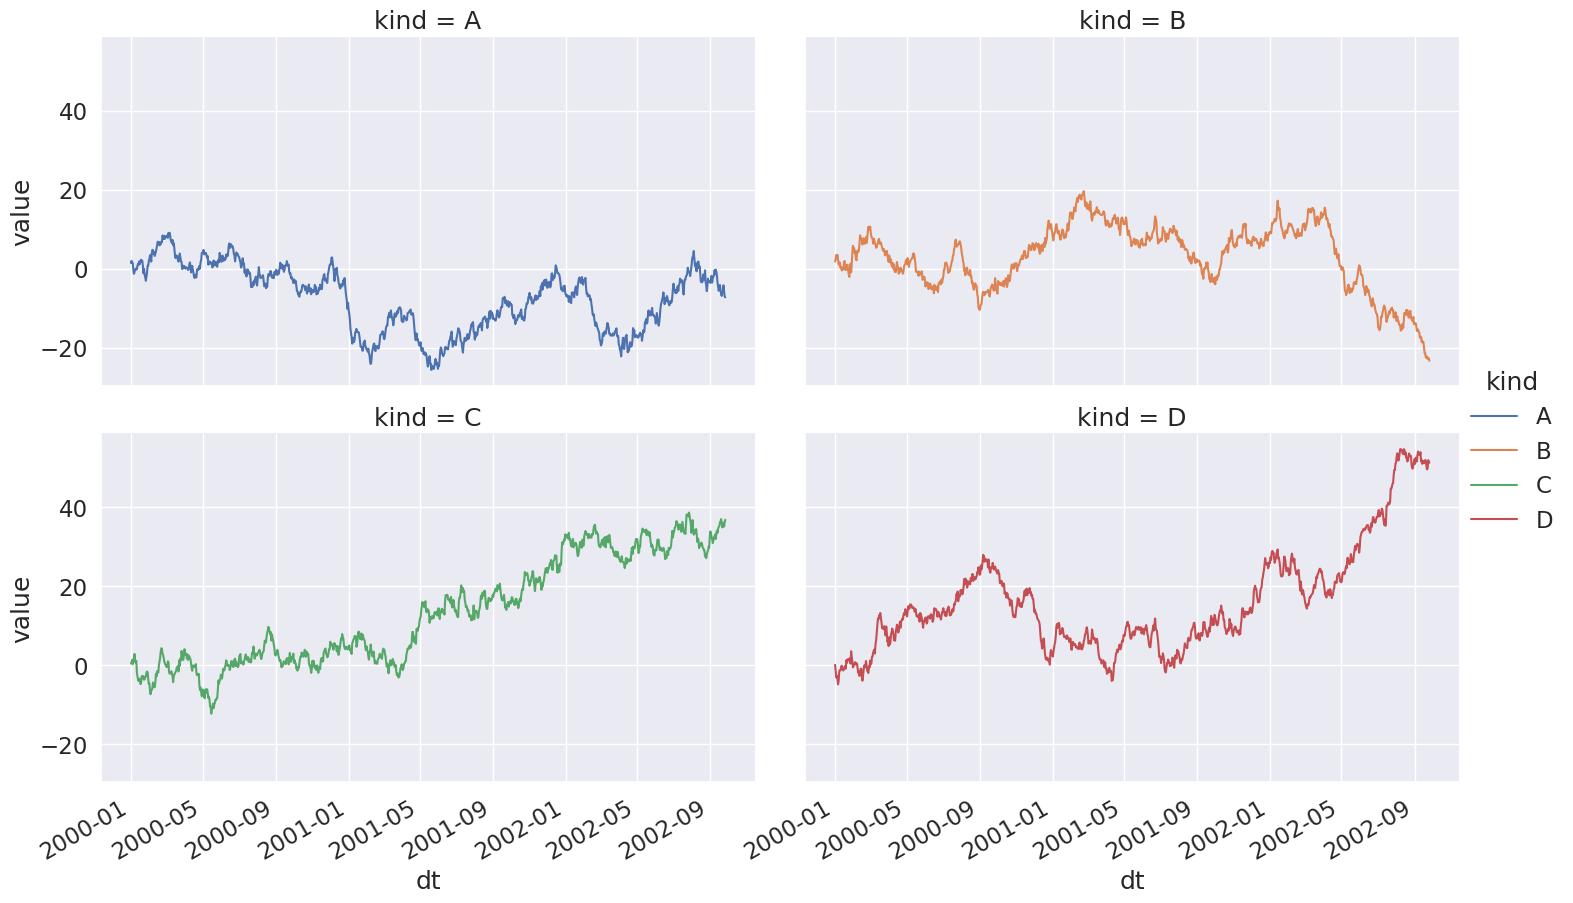

In [18]:
# g = sns.FacetGrid(ts, row='kind', hue='kind', height=5, aspect=1.5)
g = sns.FacetGrid(ts, col='kind', hue='kind', height=5, aspect=1.5, col_wrap=2)
g.map(plt.plot, 'dt', 'value').add_legend()

g.fig.autofmt_xdate()

## Plotly

https://plotly.com/

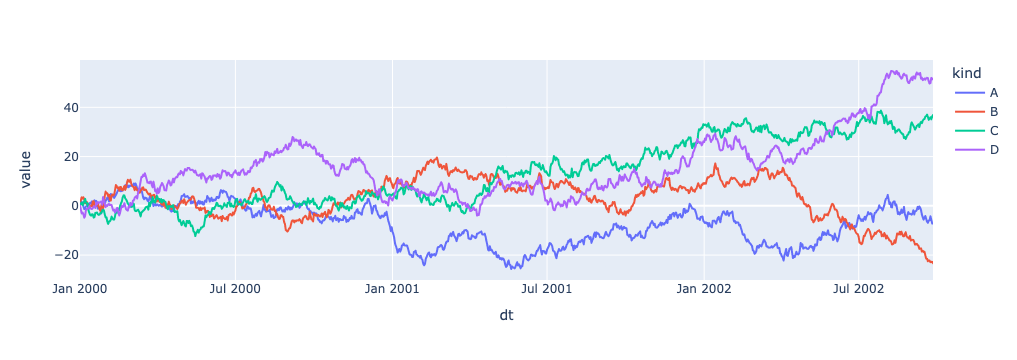

In [21]:
fig = px.line(ts, x="dt", y="value", color='kind')
fig.show()

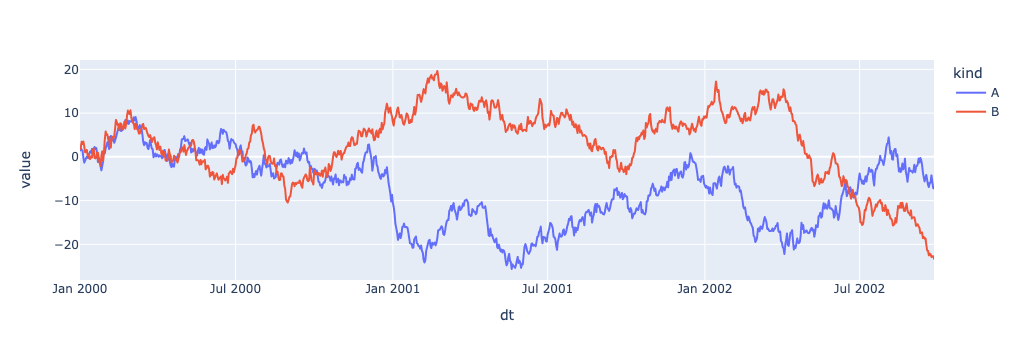

In [22]:
fig = px.line(ts.loc[ts['kind'].isin(['A','B'])], x="dt", y="value", color='kind')
fig.show()

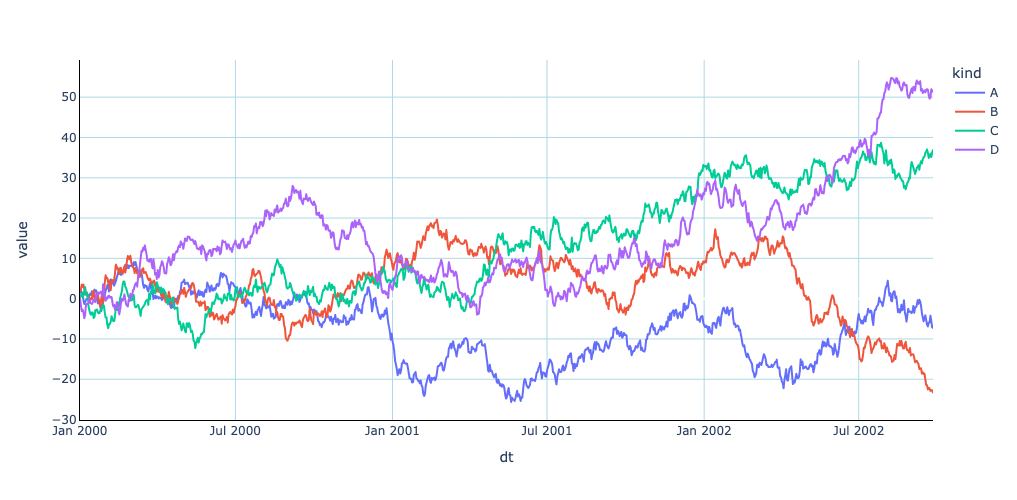

In [23]:
import plotly.express as px

fig = px.line(ts, x="dt", y="value", color='kind')
fig.update_layout(
    width=750,
    height=500,
    plot_bgcolor="White"
)
fig.update_xaxes(showline=True, linecolor='black', showgrid=True, gridwidth=1, gridcolor='LightBlue')
fig.update_yaxes(showline=True, linecolor='black', showgrid=True, gridwidth=1, gridcolor='LightBlue')
fig.show()

In [24]:
import plotly.express as px

fig = px.line(ts, x="dt", y="value", color='kind')
fig.update_layout(
    width=750,
    height=500,
    plot_bgcolor="White"
)
fig.update_xaxes(showline=True, linecolor='black', showgrid=True, gridwidth=1, gridcolor='LightBlue')
fig.update_yaxes(showline=True, linecolor='black', showgrid=True, gridwidth=1, gridcolor='LightBlue')
fig.write_html('plotly_legendselect.html')

## Altair

https://altair-viz.github.io/

In [25]:
c = altair.Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color='kind'
)
c

alt.Chart(...)

In [26]:
c = altair.Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color=altair.Color('kind', scale=altair.Scale(range=cp.as_hex()))
)
c

alt.Chart(...)

In [27]:
selopac = altair.selection_point(fields=['kind'], bind='legend')

c = altair.Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color=altair.Color('kind', scale=altair.Scale(range=cp.as_hex())),
    opacity=altair.condition(selopac, altair.value(1), altair.value(0.2))
).add_params(
    selopac
)
c

alt.Chart(...)

In [28]:
selopac = altair.selection_point(fields=['kind'], bind='legend')

c = altair.Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color=altair.Color('kind', scale=altair.Scale(range=cp.as_hex())),
    opacity=altair.condition(selopac, altair.value(1), altair.value(0.2))
).add_params(
    selopac
)
c.save('altair_legendselect.html')

In [29]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = altair.selection_point(nearest=True, on='mouseover', fields=['dt'])


c = altair.Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color=altair.Color('kind', scale=altair.Scale(range=cp.as_hex()))
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = altair.Chart(ts).mark_point().encode(
    x='dt',
    opacity=altair.value(0),
).add_params(
    nearest
)

# Draw points on the line, and highlight based on selection
points = c.mark_point().encode(
    opacity=altair.condition(nearest, altair.value(1), altair.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = c.mark_text(align='left', dx=5, dy=-5).encode(
    text=altair.condition(nearest, 'value', altair.value(' '))
)

# Draw a rule at the location of the selection
rules = altair.Chart(ts).mark_rule(color='gray').encode(
    x='dt',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
altair.layer(
    c, selectors, points, rules, text
).properties(
    width=600, height=300
)

alt.LayerChart(...)